# MATH 406 Assignment 1

**Name:** James Wu\
**Student number:** 92277235

In [14]:
### IMPORTS ###
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import approximate_taylor_polynomial as taylor

## Q1

### Q1(a)

With 2 points, we use linear interpolation. Solving for $a$ and $b$ in the interpolating function $L(x) = ax + b$ using $L(0) = 0$ and $L(1) = 1$ gives us
$$L(x) = x$$
on $[0,1]$. Then $f(1/2) \approx L(1/2)$, so
$$\boxed{f(1/2) \approx 1/2}$$

In [5]:
# Given data
x = np.array([0, 1])
y = np.array([0, 1])

# Polynomial coeffs
c = np.linalg.solve(np.vander(x), y)
print(f'Polynomial coeffs: {c}')

# Evaluate f(1/2)
ans = np.polyval(c, 1/2)
print(f'f(1/2): {ans}')

Polynomial coeffs: [1. 0.]
f(1/2): 0.5


### Q1(b)

With 3 points, we use quadratic interpolation. Solving for $a$, $b$, and $c$ in the interpolating function $Q(x) = ax^2 + bx + c$ using $Q(0) = 0$, $Q(1) = 1$, and $Q(-1) = 1/2$ gives us
$$Q(x) = \frac{3}{4}x^2 + \frac{1}{4}x$$
on $[-1,1]$. Then $f(1/2) \approx Q(1/2)$, so
$$\boxed{f(1/2) \approx 5/16}$$

In [7]:
# Given data
x = np.array([0, 1, -1])
y = np.array([0, 1, 1/2])

# Polynomial coeffs
c = np.linalg.solve(np.vander(x), y)
print(f'Polynomial coeffs: {c}')

# Evaluate f(1/2)
ans = np.polyval(c, 1/2)
print(f'f(1/2): {ans}')

Polynomial coeffs: [0.75 0.25 0.  ]
f(1/2): 0.3125


### Q1(c)

With 4 points, we use cubic interpolation. Solving for $a$, $b$, $c$, and $d$ in the interpolating function $C(x) = ax^3 + bx^2 + cx + d$ using $C(0) = 0$, $C(1) = 1$, $C(-1) = 1/2$, and $C(2) = 2$ gives us
$$C(x) = -\frac{1}{4}x^3 + \frac{3}{4}x^2 + \frac{1}{2}x$$
$$C'(x) = -\frac{3}{4}x^2 + \frac{3}{2}x + \frac{1}{2}$$
on $[-1,2]$. Then $f'(0) \approx C'(0)$, so
$$\boxed{f'(0) \approx 1/2}$$

In [9]:
# Given data
x = np.array([0, 1, -1, 2])
y = np.array([0, 1, 1/2, 2])

# Polynomial coeffs
c = np.linalg.solve(np.vander(x), y)
print(f'Polynomial coeffs: {c}')

# Differentiate polynomial
dc = np.polyder(c)
print(f'Differentiated coeffs: {dc}')

# Evaluate f'(0)
ans = np.polyval(dc, 0)
print(f"f'(0): {ans}")

Polynomial coeffs: [-0.25  0.75  0.5   0.  ]
Differentiated coeffs: [-0.75  1.5   0.5 ]
f'(0): 0.5


### Q1(d)

With 3 points, we use quadratic interpolation. Solving for $a$, $b$, and $c$ in the interpolating function $Q(x) = ax^2 + bx + c$ using $Q(0) = 1/2$, $Q(1) = 1$, and $Q(-1) = -1$ gives us
$$Q(x) = -\frac{1}{2}x^2 + x + \frac{1}{2}$$
on $[-1,1]$. Using the quadratic equation for $Q(x) = 0$ gets us the roots
$$x = \frac{-1 \pm \sqrt{1 + 1}}{-1} = 1 \pm \sqrt{2}$$
Although $1 - \sqrt{2} \in [-1,1]$, we have $1 + \sqrt{2} \notin [-1,1]$. Since our interpolation is only valid on $[-1,1]$, we approximate a root as
$$\boxed{x \approx 1 - \sqrt{2} \approx -0.414}$$

In [11]:
# Given data
x = np.array([0, 1, -1])
y = np.array([1/2, 1, -1])

# Polynomial coeffs
c = np.linalg.solve(np.vander(x), y)
print(f'Polynomial coeffs: {c}')

# Roots of quadratic
ans = np.roots(c)
print(f'Roots: {ans}')

Polynomial coeffs: [-0.5  1.   0.5]
Roots: [ 2.41421356 -0.41421356]


## Q2

First we numerically check the relative truncation error to get an *ansatz* of the number of terms we should have:

Max rel error for deg = 1: 0.07840485667761549
Max rel error for deg = 2: 0.07822539239066759
Max rel error for deg = 3: 0.011461804276752608
Max rel error for deg = 4: 0.011434873241395872
Max rel error for deg = 5: 0.0020473765267338697


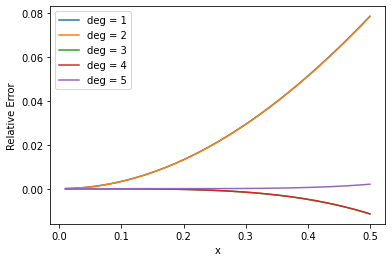

In [26]:
fig, ax = plt.subplots(figsize=(6,4))

x = np.linspace(0.01, 1/2, 1000)
y = np.arctan(x)

for deg in range(1, 6):
    err = (taylor(np.arctan, 0, deg, 0.001)(x) - y)/y
    ax.plot(x, err, label=f'deg = {deg}')
    print(f'Max rel error for deg = {deg}: {np.max(np.abs(err))}')

ax.set_xlabel('x')
ax.set_ylabel('Relative Error')
ax.legend()
plt.show()

So we should expect to go up to fifth order to have a relative error less than 1%; we will now prove this to be the case. Recall that the Taylor series for $\arctan(x)$ about $x = 0$ exists and converges on $[-1,1] \supset [0,1/2]$ as
$$\arctan(x) = \sum_{n=0}^\infty (-1)^n \frac{x^{2n+1}}{2n+1}$$
The presence of only odd powers is indeed supported by the above numerical results (based on how the error only changes every two degrees). We differentiate
$$\arctan'(x) = \frac{1}{1 + x^2}$$
So on $[0,1/2]$, we have $4/5 \leq \arctan'(x) \leq 1$. By MVT we have (note that $\arctan(x) \geq 0$ in this interval)
$$\frac{4}{5}x \leq \big|\arctan(x)\big| \leq x$$
Now let $E_N(x)$ be the error of the Taylor polynomial of degree $N$ evaluated at $x$ i.e.
$$E_N(x) = \sum_{n = \lceil N/2 \rceil}^\infty (-1)^n \frac{x^{2n+1}}{2n+1}$$
Now notice that successive terms decrease in magnitude on $x \in [0,1/2]$:
$$0 < \frac{2n+1}{2n+3} x^2 < 1 \; \therefore \; \frac{x^{2n+3}}{2n+3} = \frac{2n+1}{2n+3} x^2 \frac{x^{2n+1}}{2n+1} < \frac{x^{2n+1}}{2n+1}$$
Since the series alternates and is decreasing in magnitude versus $n$ for $x \geq 0$, we can bound
$$\frac{x^{2\lceil N/2 \rceil + 1}}{2\lceil N/2 \rceil + 1} - \frac{x^{2\lceil N/2 \rceil + 3}}{2\lceil N/2 \rceil + 3} \leq \big|E_N(x)\big| \leq \frac{x^{2\lceil N/2 \rceil + 1}}{2\lceil N/2 \rceil + 1}$$
Then the relative error $r_N(x) = \frac{\big|E_N(x)\big|}{\big|\arctan(x)\big|}$ is bounded as
$$\frac{x^{2\lceil N/2 \rceil}}{2\lceil N/2 \rceil + 1} - \frac{x^{2\lceil N/2 \rceil + 2}}{2\lceil N/2 \rceil + 3} \leq r_N(x) \leq \frac{5}{4}\frac{x^{2\lceil N/2 \rceil}}{2\lceil N/2 \rceil + 1}$$

For $N = 4$, at $x = 1/2$ we have
$$r_4(1/2) \geq \frac{(1/2)^4}{5} - \frac{(1/2)^6}{7} = \frac{23}{2240} > \frac{23}{2300} = 1\%$$
So the relative error is *not* bounded by 1% on $[0,1/2$] for $N = 4$. Now we check $N = 5$:
$$r_5(x) \leq \frac{5}{4} \frac{x^6}{7} \leq \frac{5}{4} \frac{(1/2)^6}{7} = \frac{5}{1792} < \frac{5}{500} = 1\%$$
The first inequality follows from how $x \leq 1/2$. Thus the $N = 5$ polynomial does have a relative error less than 1% on $[0,1/2]$.

So we must use the Taylor polynomial
$$\boxed{T_5(x) = x - \frac{x^3}{3} + \frac{x^5}{5}}$$
to obtain a relative error less than 1%. Though we may quibble over whether this counts as three terms or six (i.e. whether we should count the even powers of $x$, which have coefficients of zero), the Taylor polynomial required is unambiguous.

## Q3

TODO